<a href="https://colab.research.google.com/github/Abishethvarman/ChatGPT-Education/blob/main/ChatGPT_Education_RNN_LSTM_3C_5E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of tweets on education in ChatGPT
## Bi-directional LSTM with RNN Architecture for 3 classes (5 iteration)
Neutral - 0
Positive - 1
Negative - 2


---


The data set : https://drive.google.com/file/d/1Lw3UNB5FCUQqm1Otk7EYBvpDyIHM7ALi/view?usp=drive_link

---


Orgin: https://www.kaggle.com/datasets/nutrientaxis/chatgpt-and-education-tweets-dataset?select=ChatGPT_Education_Tweets_Dataset.csv

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
import gensim
from nltk import download
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("stopwords")
download('punkt')

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
%cd /mydrive/dataset/

/content/gdrive/My Drive/dataset


In [ ]:
df_data = pd.read_csv("ChatGPT_Education_Tweets_Dataset.csv")

In [ ]:
#labels to integers
df_data['sentiment'] = df_data['sentiment'].replace({'neutral': 0, 'positive': 1, 'negative': 2})

In [ ]:
# Preprocessing
def preprocess(text):
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'one', 'two', 'more'])

    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() != 'mor']
    return ' '.join(filtered_words)

In [ ]:
# Apply preprocessing
df_data['clean'] = df_data['text'].apply(preprocess)

In [ ]:

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_data['clean'])
sequences = tokenizer.texts_to_sequences(df_data['clean'])
maxlen = 40

# Get the total number of unique words
# Adding 1 to account for padding token
total_words = len(tokenizer.word_index) + 1

# Padding the sequences
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')


In [ ]:
# Split data into train and test sets 80:20
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, df_data['sentiment'], test_size=0.2)

In [ ]:
# Create a multi-class LSTM model
model = Sequential()
model.add(Embedding(total_words, output_dim=128))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(3, activation='softmax'))  # Output layer with softmax for multi-class classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         14868224  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 15,132,163
Trainable params: 15,132,163
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=64, validation_split=0.1, epochs=5)


Epoch 1/5
2659/2659 [==============================] - 1463s 548ms/step - loss: 0.6074 - acc: 0.7338 - val_loss: 0.5381 - val_acc: 0.7658
Epoch 2/5
2659/2659 [==============================] - 1484s 558ms/step - loss: 0.4343 - acc: 0.8191 - val_loss: 0.5557 - val_acc: 0.7630
Epoch 3/5
2659/2659 [==============================] - 1509s 568ms/step - loss: 0.3247 - acc: 0.8701 - val_loss: 0.5987 - val_acc: 0.7547
Epoch 4/5
2659/2659 [==============================] - 1503s 565ms/step - loss: 0.2386 - acc: 0.9068 - val_loss: 0.7255 - val_acc: 0.7531
Epoch 5/5
2659/2659 [==============================] - 1933s 727ms/step - loss: 0.1760 - acc: 0.9320 - val_loss: 0.8681 - val_acc: 0.7436


1477/1477 [==============================] - 121s 80ms/step
Model Accuracy: 0.7465030155539096
Classification Report:
               precision    recall  f1-score   support

     neutral       0.77      0.78      0.78     24370
    positive       0.76      0.74      0.75     14025
    negative       0.66      0.66      0.66      8860

    accuracy                           0.75     47255
   macro avg       0.73      0.73      0.73     47255
weighted avg       0.75      0.75      0.75     47255



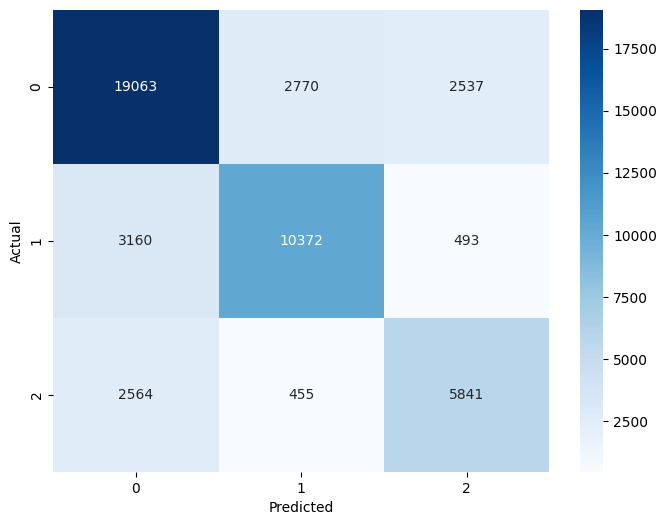

In [ ]:
# Classification and Evaluation
predictions = model.predict(x_test)
classification = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_test, classification)
print("Model Accuracy:", accuracy)

report = classification_report(y_test, classification, target_names=["neutral", "positive", "negative"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, classification)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
